In [1]:
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure


In [2]:
model_w2v = Word2Vec.load('./models/model_w2v.w2v')

In [3]:
model_w2v.wv.most_similar('хоббит')

[('пин', 0.8379892110824585),
 ('бильбо', 0.8375735878944397),
 ('мерри', 0.8373486399650574),
 ('фродый', 0.803866446018219),
 ('бродяжник', 0.7843536734580994),
 ('древень', 0.7783494591712952),
 ('бирюк', 0.7693896293640137),
 ('леголаса', 0.7676564455032349),
 ('поглядеть', 0.7632220983505249),
 ('вон', 0.7625152468681335)]

In [4]:
tsne = TSNE(n_components=2, n_iter=1000)
X_2d = tsne.fit_transform(model_w2v.wv[model_w2v.wv.key_to_index.keys()])
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model_w2v.wv.key_to_index.keys()

D:\Dev\GraduateProject\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Dev\GraduateProject\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


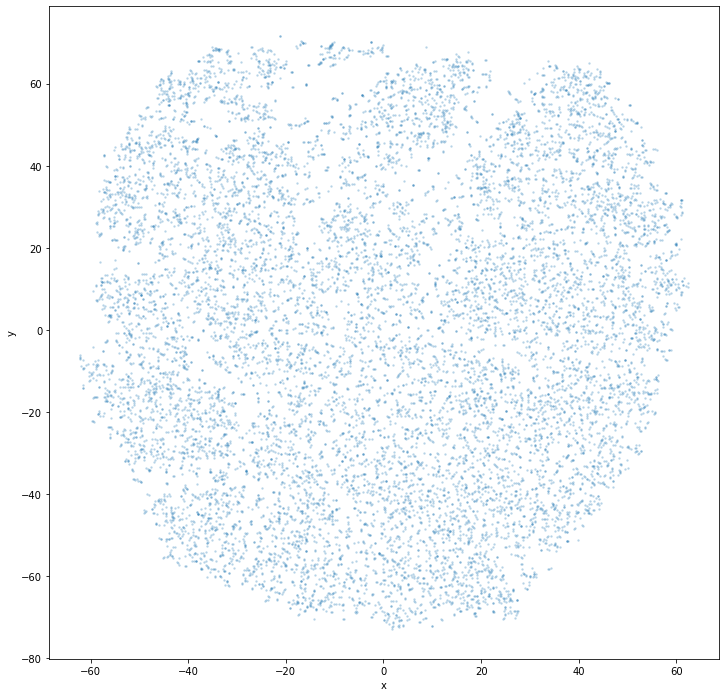

In [5]:

_ = coords_df.plot.scatter('x', 'y', figsize=(12, 12),
                           marker='.', s=10, alpha=0.2)


In [6]:
output_notebook()
subset_df = coords_df.sample(n=5000)
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)
show(p)

Loading BokehJS ...